In [28]:
import pandas as pd

In [43]:
import warnings

In [46]:
warnings.filterwarnings('ignore')

In [29]:
import numpy as np

In [30]:
import seaborn as sns

In [31]:
from sklearn.cluster import KMeans

In [32]:
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('/Users/vidhyadraparshuramkargmail.com/Downloads/Mall Customers.csv')

In [50]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
data.shape

(200, 5)

## Checking missing value

In [37]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [38]:
a = data.iloc[: , [3,4]].values
a

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Choosing the number of cluster 
## WCSS - Withing Cluster Sum of Square

In [48]:
# Finding wcss value for different number of cluster
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state= 42)
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)

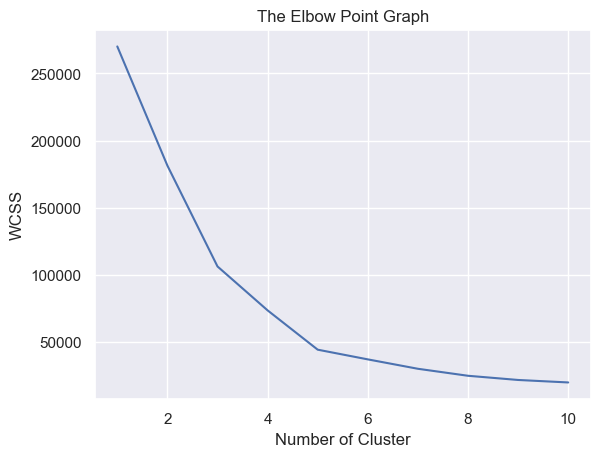

In [51]:
# Plot amn elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [56]:
kmeans = KMeans(n_clusters=10,init='k-means++',random_state=0)
b= kmeans.fit_predict(a)
print (b)

[2 3 6 3 2 3 6 3 6 3 6 3 6 3 6 3 2 3 2 3 2 3 6 3 6 3 2 3 2 3 6 3 6 3 6 3 6
 3 2 3 2 3 2 4 2 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 8 4 4 8 8 4 4 4 4 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 9 8 0 8 9 1 0 1 0 8 0 1 9 1 0 1 0 1 9 8 9 1 9 8 0
 1 9 1 9 1 0 1 9 1 0 1 0 8 9 1 9 1 0 1 9 1 0 1 0 1 9 1 9 1 0 1 9 5 9 5 9 5
 9 5 7 5 7 5 7 5 7 5 7 5 7 5 7]


## Visualizing all Clusters

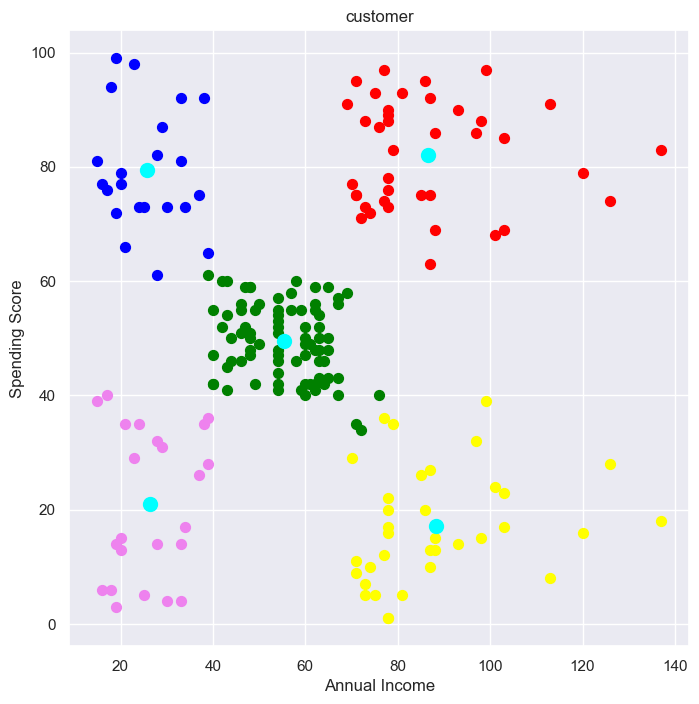

In [40]:
plt.figure(figsize=(8,8))
plt.scatter(a[b==0,0],a[b==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(a[b==1,0],a[b==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(a[b==2,0],a[b==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(a[b==3,0],a[b==3,1],s=50,c='violet',label='Cluster 4')
plt.scatter(a[b==4,0],a[b==4,1],s=50,c='blue',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100,c = 'cyan', label = 'Centroid' )
plt.title('customer')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()